In [66]:
import torch

torch.__version__

'2.8.0+cpu'

In [67]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data", path="loan_data.csv")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\himan\.cache\kagglehub\datasets\taweilo\loan-approval-classification-data\versions\1\loan_data.csv


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# load the data

df = pd.read_csv(path)

df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [70]:
# check for missing values

df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [71]:
# check for duplicates

df.duplicated().sum()

np.int64(0)

## EDA

In [72]:
# dtypes of columns

df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [73]:
# separate the numerical and categorical data

numerical_data = df.select_dtypes(include=np.number)

categorical_data = df.select_dtypes(exclude=np.number)

In [74]:
numerical_data

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


In [75]:
# statistical summary for numerical data

numerical_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [76]:
categorical_data.describe()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [77]:
# numerical columns in data

num_cols = numerical_data.columns[0:-1].tolist()

num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [78]:
from matplotlib.gridspec import GridSpec

In [79]:
def plots_for_num_cols(numerical_col):
    plt.figure(figsize=(12,4))
    grid = GridSpec(nrows=1, ncols=4)
    
    # set the axes
    # boxplot
    ax1 = plt.subplot(grid[:,0])
    # histogram
    ax2 = plt.subplot(grid[:,1:3])
    # violin plot
    ax3 = plt.subplot(grid[:,3])
    
    # create boxplot
    sns.boxplot(data=df, y=numerical_col,ax=ax1)
    # create histogram
    sns.histplot(data=df,x=numerical_col,ax=ax2)
    # create violin plot
    sns.violinplot(data=df,y=numerical_col,ax=ax3)
    plt.tight_layout()
    plt.show()

PERSON_AGE


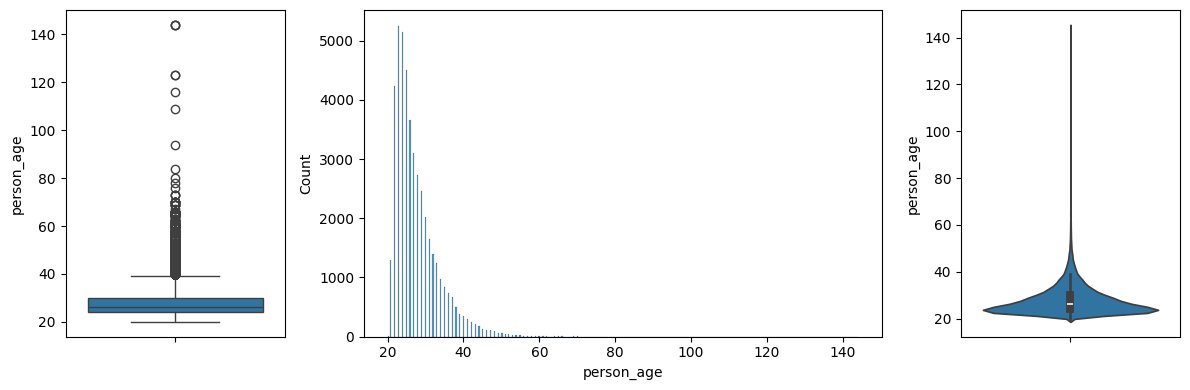


PERSON_INCOME


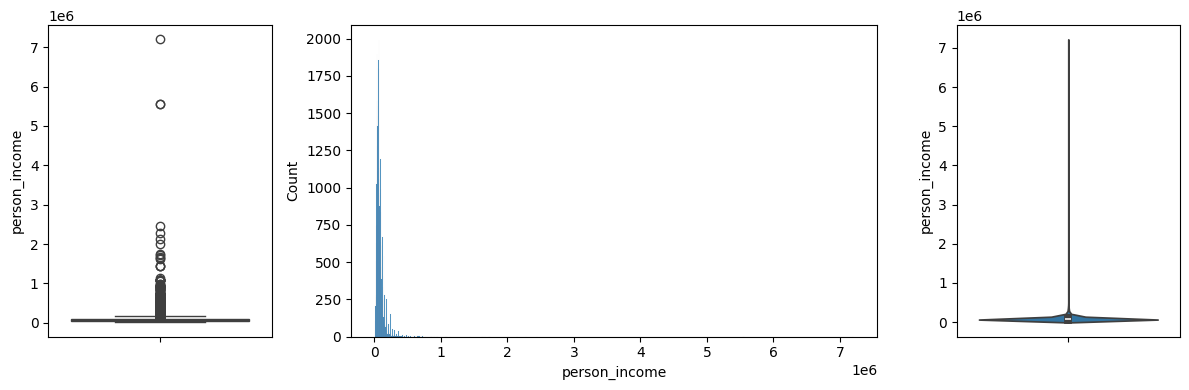


PERSON_EMP_EXP


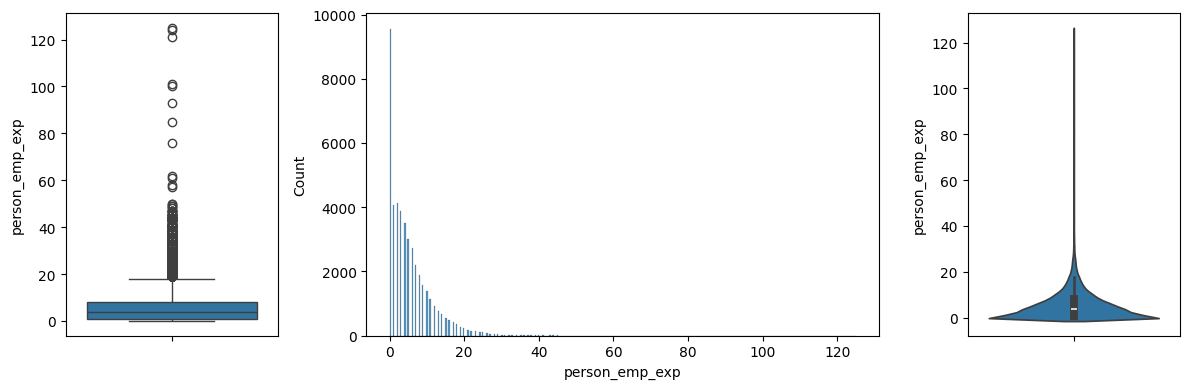


LOAN_AMNT


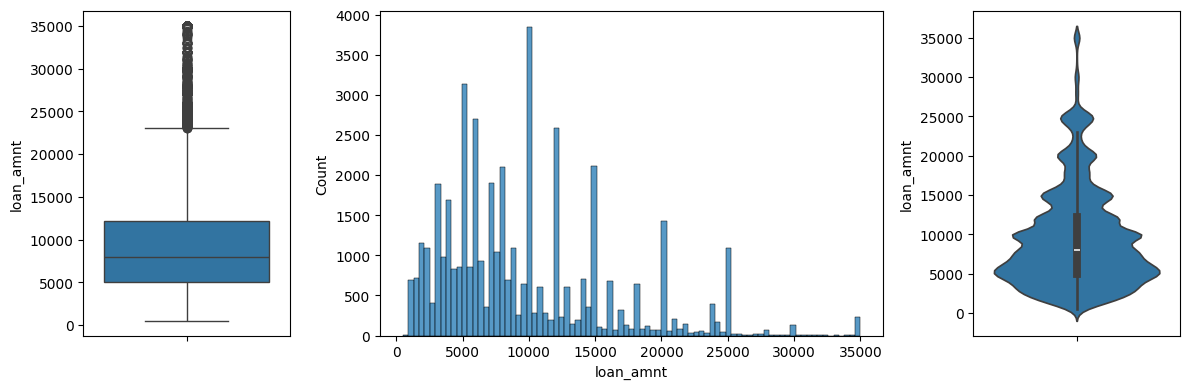


LOAN_INT_RATE


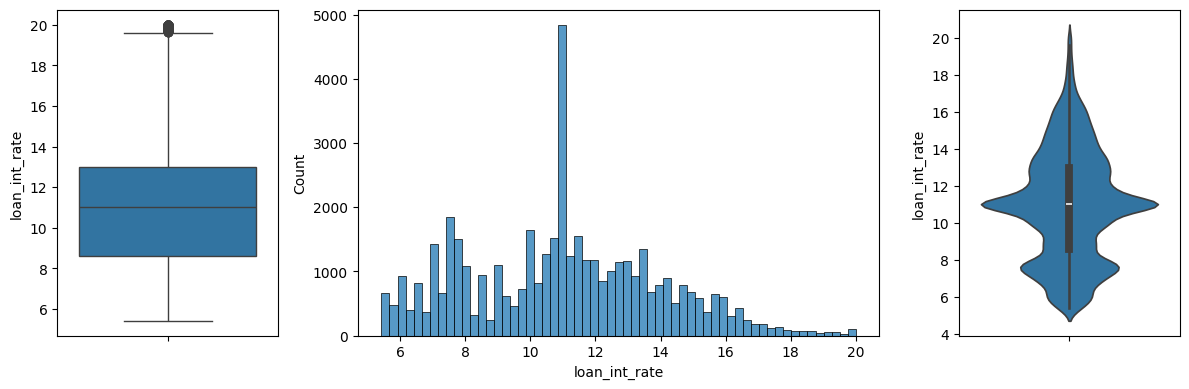


LOAN_PERCENT_INCOME


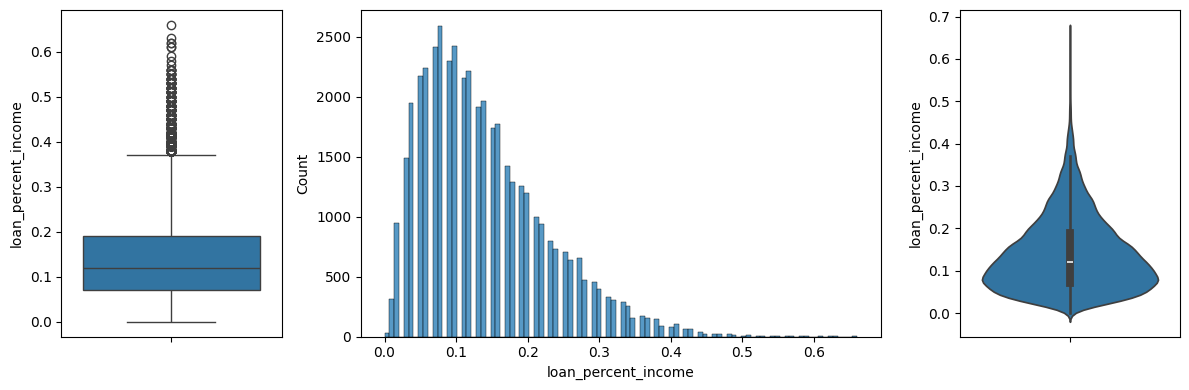


CB_PERSON_CRED_HIST_LENGTH


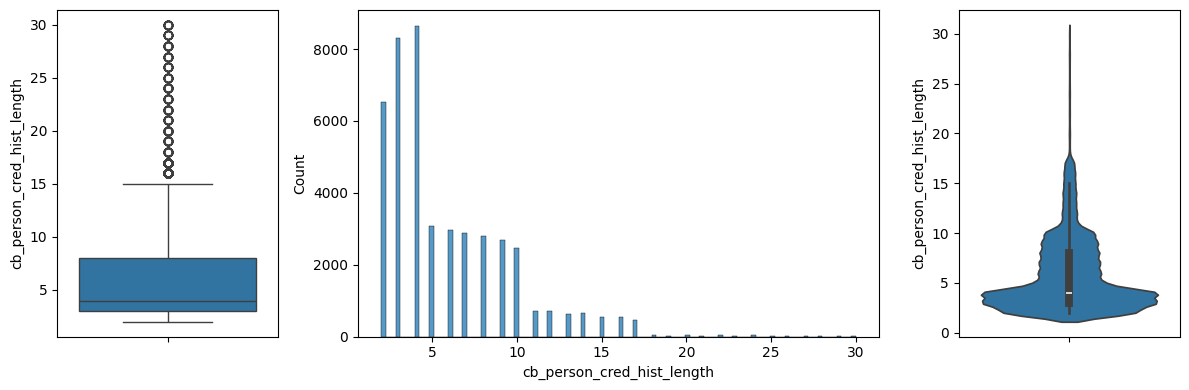


CREDIT_SCORE


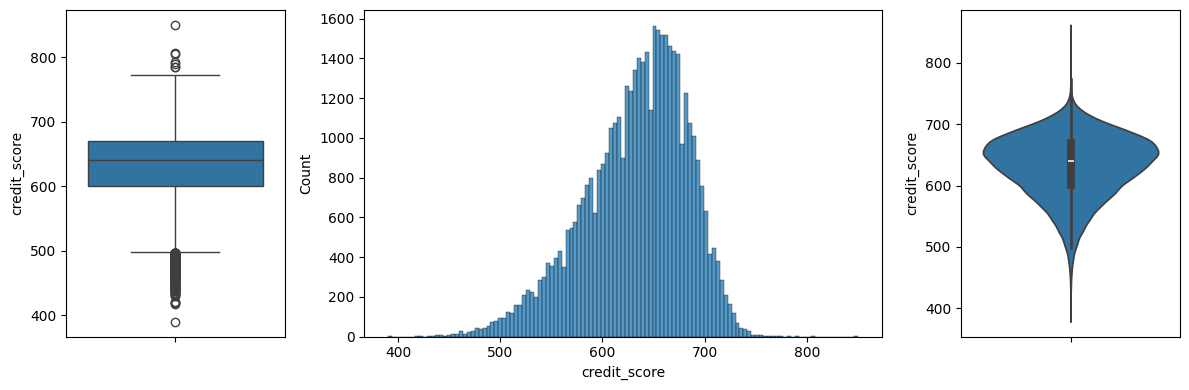

In [80]:
for col in num_cols:
    print(f"{col.upper()}")
    plots_for_num_cols(col)
    print()

In [81]:
def plots_for_cat_cols(column_name):
    print(f"Number of unique values in {column_name}: {df[column_name].nunique()}", end="\n\n")
    print(f"Unique values in {column_name}: {df[column_name].unique()}", end="\n\n")
    display(df[column_name].value_counts(normalize=True))
    sns.countplot(data=df, x=column_name)
    plt.xticks(rotation=45)
    plt.show()

In [82]:
numerical_data.columns[[-1]].tolist()

['loan_status']

In [83]:
cat_cols = categorical_data.columns.tolist() + numerical_data.columns[[-1]].tolist() 

cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file',
 'loan_status']

Number of unique values in person_gender: 2

Unique values in person_gender: ['female' 'male']



person_gender
male      0.552022
female    0.447978
Name: proportion, dtype: float64

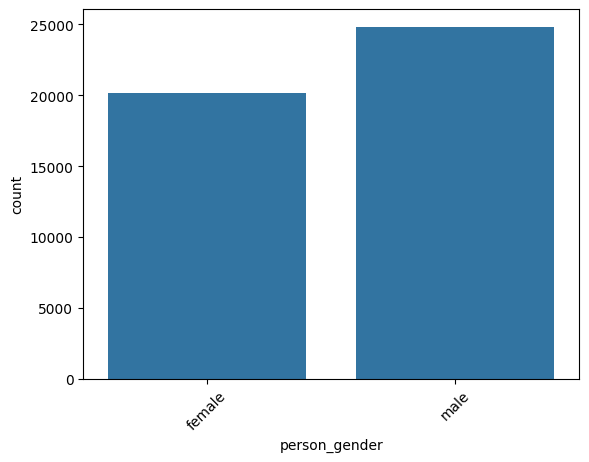

Number of unique values in person_education: 5

Unique values in person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']



person_education
Bachelor       0.297756
Associate      0.267289
High School    0.266044
Master         0.155111
Doctorate      0.013800
Name: proportion, dtype: float64

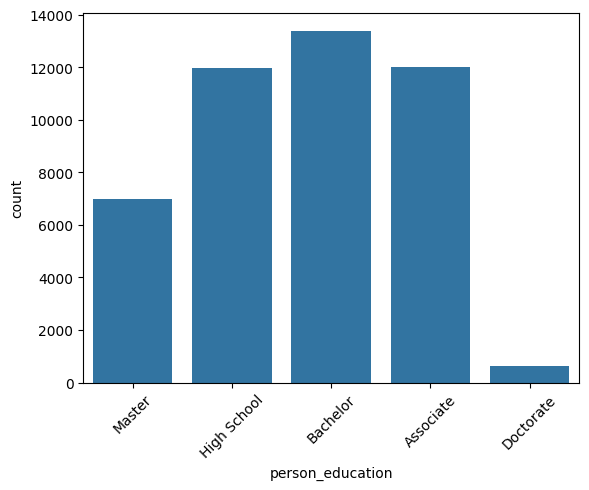

Number of unique values in person_home_ownership: 4

Unique values in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']



person_home_ownership
RENT        0.520956
MORTGAGE    0.410867
OWN         0.065578
OTHER       0.002600
Name: proportion, dtype: float64

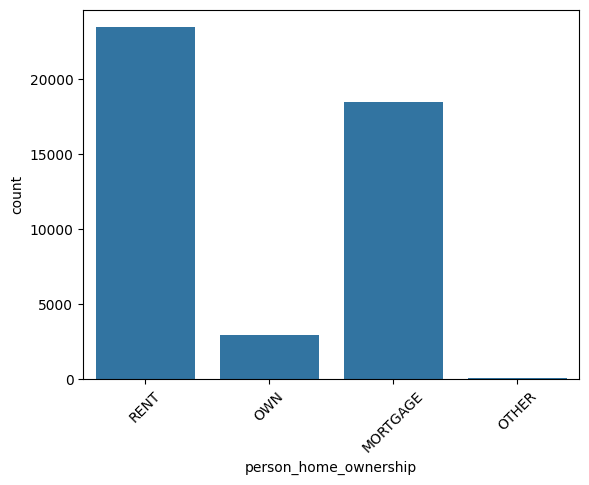

Number of unique values in loan_intent: 6

Unique values in loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']



loan_intent
EDUCATION            0.203400
MEDICAL              0.189956
VENTURE              0.173756
PERSONAL             0.167822
DEBTCONSOLIDATION    0.158778
HOMEIMPROVEMENT      0.106289
Name: proportion, dtype: float64

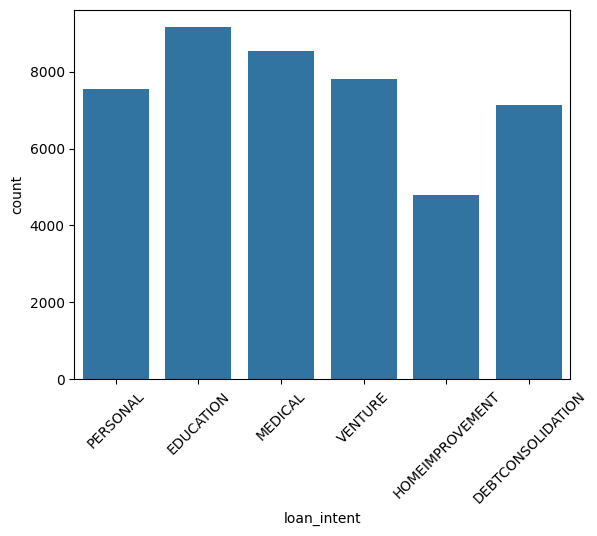

Number of unique values in previous_loan_defaults_on_file: 2

Unique values in previous_loan_defaults_on_file: ['No' 'Yes']



previous_loan_defaults_on_file
Yes    0.507956
No     0.492044
Name: proportion, dtype: float64

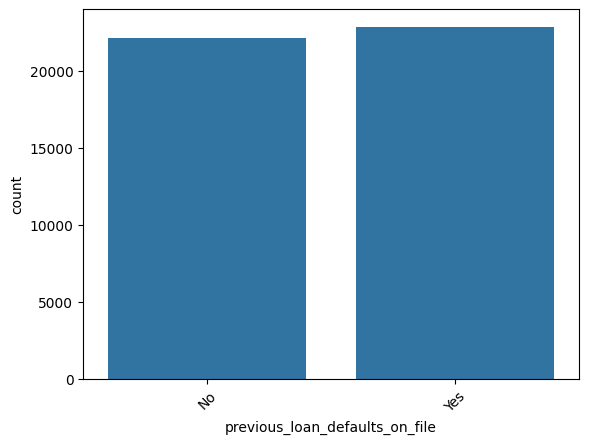

Number of unique values in loan_status: 2

Unique values in loan_status: [1 0]



loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

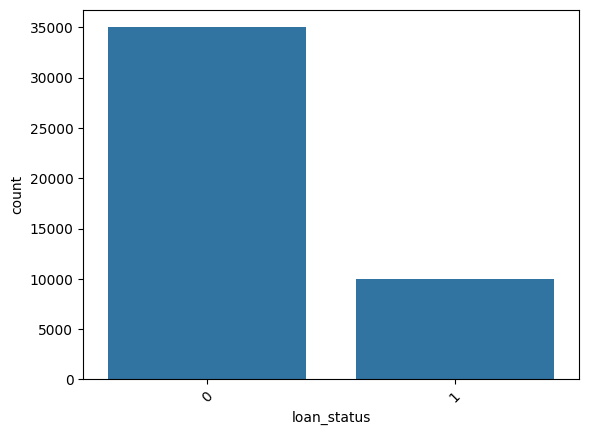

In [84]:
for col in cat_cols:
    plots_for_cat_cols(col)

## FE

In [85]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split

In [86]:
df.columns[-1]

'loan_status'

In [87]:
# make X and y

X, y = df.drop(columns=["loan_status"]), df['loan_status']

In [88]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, 
                                                    random_state=42, stratify=y,
                                                    shuffle=True)

print("shape of training data is ", X_train.shape)
print("shape of test data is ", X_test.shape)


shape of training data is  (36000, 13)
shape of test data is  (9000, 13)


In [89]:
num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [90]:
cat_cols.pop(-1)

'loan_status'

In [91]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [92]:
from sklearn.pipeline import Pipeline

In [93]:
# pipeline for numerical column
# 1. Outlier Capping
# 2. Scaling --> Robust Scaler

num_pipe = Pipeline(steps=[
    ("outlier", Winsorizer(capping_method="iqr", tail="both", fold=1.5)),
    ("scaling", RobustScaler())
])

num_pipe

,steps,"[('outlier', ...), ('scaling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,capping_method,'iqr'
,tail,'both'
,fold,1.5
,add_indicators,False
,variables,None
,missing_values,'raise'
,with_centering,True


In [94]:
cat_cols.pop(1)

'person_education'

In [95]:
ohe_cols = cat_cols

In [96]:
order_of_education = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']

In [97]:
# transformer object
# 1. OHE
# 2. Num pipe  
# 3. Ordinal encode --> education

preprocessor = ColumnTransformer(transformers=[
    ("num_pipe", num_pipe, num_cols),
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"), ohe_cols),
    ("ordinal", OrdinalEncoder(categories=[order_of_education], handle_unknown="use_encoded_value",
                               unknown_value=-1), ["person_education"])
], remainder="passthrough", n_jobs=-1, verbose_feature_names_out=False)

preprocessor

,transformers,"[('num_pipe', ...), ('ohe', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,capping_method,'iqr'
,tail,'both'
,fold,1.5


In [98]:
X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

In [99]:
# feature names

feature_names = preprocessor.get_feature_names_out()

feature_names

array(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'person_gender_male',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes', 'person_education'],
      dtype=object)

In [100]:
feature_names.shape

(19,)

In [101]:
X_train

array([[-0.33333333, -0.16634333, -0.28571429, ...,  1.        ,
         1.        ,  3.        ],
       [-0.5       , -0.43195902, -0.28571429, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.5       ,  2.09432555,  0.42857143, ...,  1.        ,
         1.        ,  3.        ],
       ...,
       [ 0.66666667,  0.11619795,  0.71428571, ...,  0.        ,
         1.        ,  2.        ],
       [ 0.66666667, -0.55913519,  0.57142857, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.16666667, -0.36995962,  0.14285714, ...,  0.        ,
         0.        ,  3.        ]], shape=(36000, 19))

## Model Building

In [102]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

### Build the Dataset

In [103]:
y_train.values

array([0, 0, 0, ..., 0, 0, 1], shape=(36000,))

In [104]:
# create a Dataset class

class LoanDataset(Dataset):
    
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).to(torch.float32)
        self.y = torch.from_numpy(y.values).to(torch.float)
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        row, label = self.X[idx], self.y[idx]
        return row, label

In [105]:
temp_dataset = LoanDataset(X_train[:10],y_train.iloc[:10])

temp_dataset

In [106]:
len(temp_dataset)

10

In [107]:
temp_dataset[0]

(tensor([-0.3333, -0.1663, -0.2857, -0.4976, -1.1325, -0.4167,  0.0000,  0.2353,
          1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  1.0000,  3.0000]),
 tensor(0.))

In [108]:
X_train[0], y_train.iloc[0]

(array([-0.33333333, -0.16634333, -0.28571429, -0.4975812 , -1.13254371,
        -0.41666667,  0.        ,  0.23529412,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  3.        ]),
 np.int64(0))

In [109]:
# define the datasets

train_dataset = LoanDataset(X_train, y_train)
test_dataset = LoanDataset(X_test, y_test)

In [110]:
# define the dataloader

train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=32,
                             shuffle=False)

In [111]:
for batch_features, batch_label in train_dataloader:
    print(batch_features)
    print(batch_features.shape)
    print(batch_label)
    print(batch_label.shape)
    
    break

tensor([[ 0.0000,  0.2357, -0.1429,  0.5529, -0.0045,  0.2500,  0.0000,  0.1765,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  3.0000],
        [-0.6667, -0.0496, -0.5714, -0.4147, -0.7016, -0.3333,  0.0000, -1.5000,
          1.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  0.0000],
        [ 1.0000,  0.4767,  0.8571, -0.2271, -0.0248, -0.4167,  1.2000,  0.2647,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  1.0000,  3.0000],
        [-0.6667,  0.2787, -0.5714,  0.0000,  1.6650, -0.1667,  0.0000,  0.7794,
          1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  3.0000],
        [ 0.3333, -0.3658,  0.1429,  1.5290, -0.2482,  2.0833,  1.0000, -0.1471,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
     

### Model Arch

In [112]:
# create the model

class MyModel(nn.Module):
    
    def __init__(self, num_features):
        super().__init__()
        
        self.network = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()           
        )
        
    def forward(self, X):
        predictions = self.network(X)
        return predictions

In [113]:
# define the model

model = MyModel(num_features=X_train.shape[1])

In [114]:
model

MyModel(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [115]:
# set the epochs and lr

epochs = 30
lr = 0.001

In [116]:
from torch.optim import Adam

In [117]:
# set the optimizer
optimizer = Adam(params=model.parameters(), lr=lr)

In [118]:
# set our loss function

loss_fn = nn.BCELoss()

In [119]:
len(train_dataloader)

1125

In [120]:
for batch_features_train, batch_labels_train in train_dataloader:
    print("Input: ", batch_features_train.shape)  
    # forward pass
    y_pred_train = model(batch_features_train)
    print("Predictions: ", y_pred_train.shape)
    print(y_pred_train[0:3])
    print("Labels: ", batch_labels_train.unsqueeze(1).shape)
    
    break

Input:  torch.Size([32, 19])
Predictions:  torch.Size([32, 1])
tensor([[0.5107],
        [0.4802],
        [0.3759]], grad_fn=<SliceBackward0>)
Labels:  torch.Size([32, 1])


In [121]:
# training loop

train_batches = len(train_dataloader)
test_batches = len(test_dataloader)

# iterate over all the epochs
for epoch in range(1, epochs+1):
    train_loss = 0
    test_loss = 0
    
    # iterate over the batches of training data
    for batch_features_train, batch_labels_train in train_dataloader:
        
        # forward pass
        y_pred_train = model(batch_features_train)
        
        # calculate the loss
        batch_loss_train = loss_fn(y_pred_train, batch_labels_train.unsqueeze(1))
        
        # clear the gradients
        optimizer.zero_grad()
        
        # calculate the gradients using backprop
        batch_loss_train.backward()
        
        # update the model parameters
        optimizer.step()
        
        # add batch loss to epoch loss
        train_loss += batch_loss_train.item()
        
    # iterate over the batches of test data
    for batch_features_test, batch_labels_test in test_dataloader:
        with torch.no_grad():
            # forward pass
            y_pred_test = model(batch_features_test)
            
            # calculate the loss
            batch_loss_test = loss_fn(y_pred_test, batch_labels_test.unsqueeze(1))
            
            # add batch loss to epoch loss
            test_loss += batch_loss_test.item()
            
    avg_train_loss = train_loss / train_batches
    avg_test_loss = test_loss / test_batches
    
    print(f"Epoch: {epoch}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}")
        

Epoch: 1, Train Loss: 0.23177811852428648, Test Loss: 0.20143734525017282
Epoch: 2, Train Loss: 0.20049898889329698, Test Loss: 0.19215865282619254
Epoch: 3, Train Loss: 0.19543865529033874, Test Loss: 0.19207145463913045
Epoch: 4, Train Loss: 0.19201491378413307, Test Loss: 0.19162144110346516
Epoch: 5, Train Loss: 0.18806969958874914, Test Loss: 0.19117079219444
Epoch: 6, Train Loss: 0.1881450147330761, Test Loss: 0.18871492538469056
Epoch: 7, Train Loss: 0.18467321757144398, Test Loss: 0.18792774771333587
Epoch: 8, Train Loss: 0.1848802918129497, Test Loss: 0.19011179649713614
Epoch: 9, Train Loss: 0.1818521225568321, Test Loss: 0.18897431549873758
Epoch: 10, Train Loss: 0.18134158078167173, Test Loss: 0.1934708500056402
Epoch: 11, Train Loss: 0.17879259458846516, Test Loss: 0.1909820624884773
Epoch: 12, Train Loss: 0.17897524166603884, Test Loss: 0.18764999100661023
Epoch: 13, Train Loss: 0.1768239914874236, Test Loss: 0.18691707397183627
Epoch: 14, Train Loss: 0.17829618988268905,

In [122]:
from sklearn.metrics import classification_report

In [123]:
# model to be set to eval mode

model.eval()

MyModel(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [124]:
# define the dataloader

train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=32,
                              shuffle=False)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=32,
                             shuffle=False)

In [125]:
# calculate the predictions on training data

train_predictions = []

for batch_features, batch_labels in train_dataloader:
    with torch.no_grad():
        y_pred = model(batch_features).squeeze(1).numpy()
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        train_predictions.extend(y_pred)
        
 
y_pred_train = np.array(train_predictions)   

In [126]:
y_pred_train.shape, y_train.shape

((36000,), (36000,))

In [127]:
# calculate the predictions on test data

test_predictions = []

for batch_features, batch_labels in test_dataloader:
    with torch.no_grad():
        y_pred = model(batch_features).squeeze(1).numpy()
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        test_predictions.extend(y_pred)
        
 
y_pred_test = np.array(test_predictions)   

In [128]:
y_pred_test.shape, y_test.shape

((9000,), (9000,))

In [129]:
# classifictaion report for training data

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     28000
           1       0.93      0.75      0.83      8000

    accuracy                           0.93     36000
   macro avg       0.93      0.87      0.90     36000
weighted avg       0.93      0.93      0.93     36000



In [130]:
# classifictaion report for testdata

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7000
           1       0.89      0.72      0.80      2000

    accuracy                           0.92      9000
   macro avg       0.91      0.85      0.87      9000
weighted avg       0.92      0.92      0.92      9000



## SHAP

In [131]:
import shap

In [133]:
X_train.shape

(36000, 19)

In [134]:
X_test.shape

(9000, 19)

In [137]:
# manual random seed

np.random.seed(42)

In [138]:
# 500 index values --> random sampling

idx_values = np.random.choice(a=X_train.shape[0],size=500,replace=False)

In [142]:
# create the background data for our deep explainer

sample_training_data = X_train[idx_values,:]

background_data = torch.tensor(sample_training_data, dtype=torch.float32)

In [144]:
# shape of sample training data
background_data.shape

torch.Size([500, 19])

In [145]:
# create explainer to calculate the shap values
explainer = shap.DeepExplainer(model=model,
                               data=background_data)

In [146]:
# expected value

explainer.expected_value

array([0.22646996], dtype=float32)

In [147]:
# batch of test data

n_rows = 30

idx_values_batch = np.random.choice(a=X_test.shape[0],size=n_rows,replace=False)

X_test_batch = X_test[idx_values_batch,:]

In [148]:
X_test_batch.shape

(30, 19)

In [149]:
# create the batch data into tensor

X_test_batch = torch.tensor(X_test_batch, dtype=torch.float32)

In [151]:
# calculate the shap values

shap_values = explainer(X_test_batch)

In [152]:
# shape of shap values

shap_values.shape

(30, 19, 1)

In [157]:
type(shap_values)

shap._explanation.Explanation

In [167]:
base_value = explainer.expected_value

In [168]:
preprocessor.get_feature_names_out()

array(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'person_gender_male',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes', 'person_education'],
      dtype=object)

In [169]:
# make changes to the explanation object

shap_values = shap.Explanation(
    values=shap_values.values,
    base_values=base_value,
    data=X_test_batch,
    feature_names=preprocessor.get_feature_names_out()
)

In [170]:
shap_values.base_values

array([0.22646996], dtype=float32)

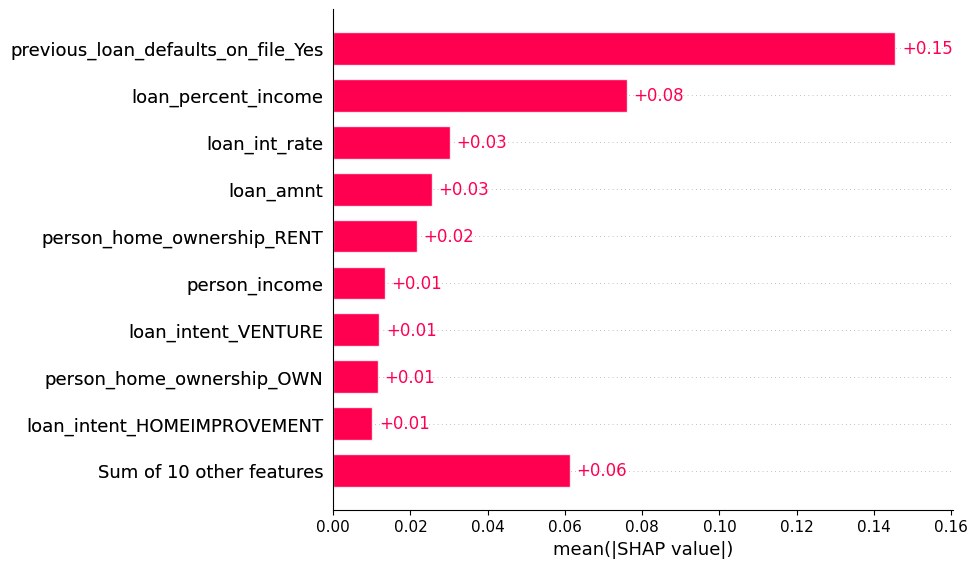

In [171]:
# bar plot

shap.plots.bar(shap_values[:,:,0])

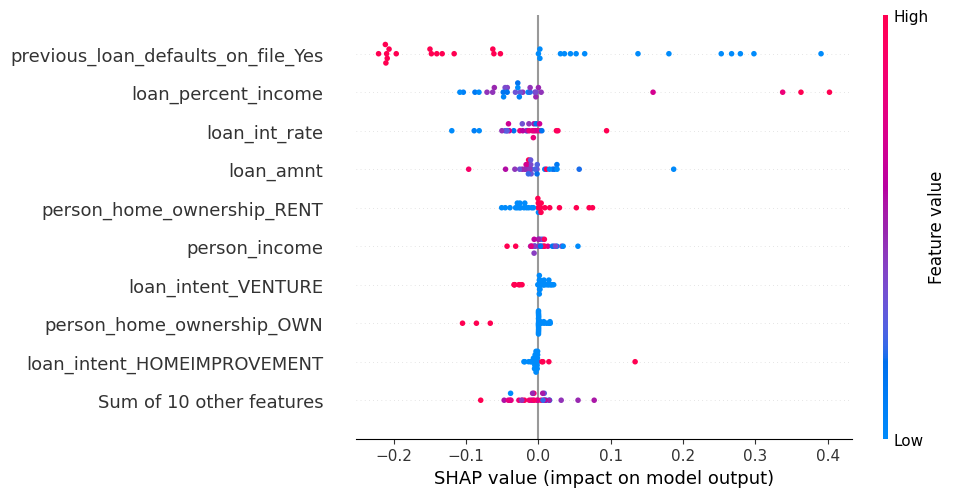

In [174]:
# summary plot

shap.plots.beeswarm(shap_values[:,:,0])

In [172]:
shap_values[0,:,0].shape

(19,)

## Local Plots

In [175]:
row_shap_value = shap_values[0,:,0]

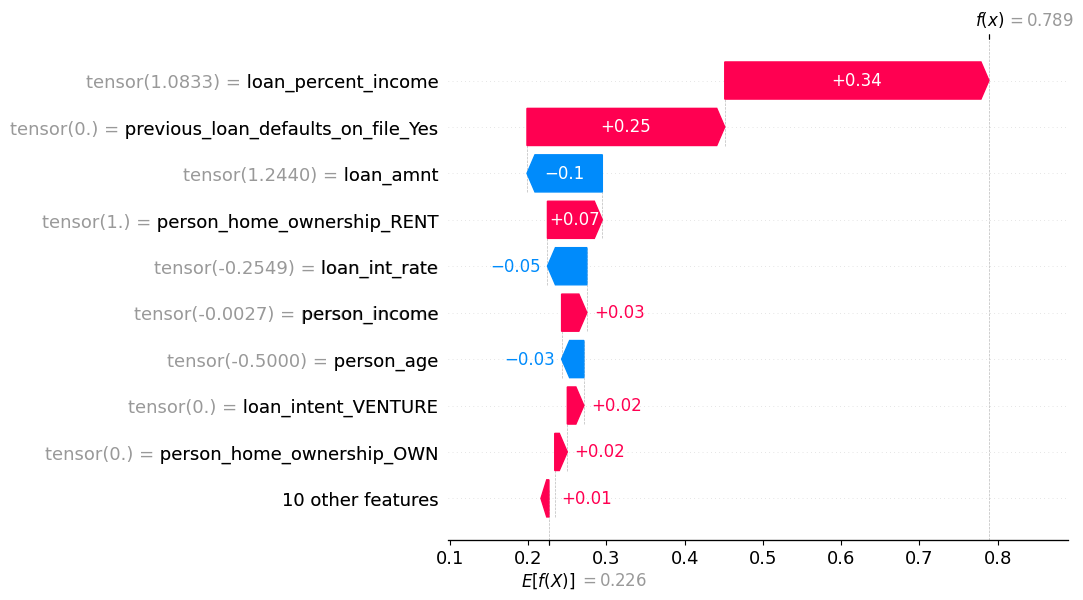

In [176]:
# waterfall plot

shap.plots.waterfall(row_shap_value)

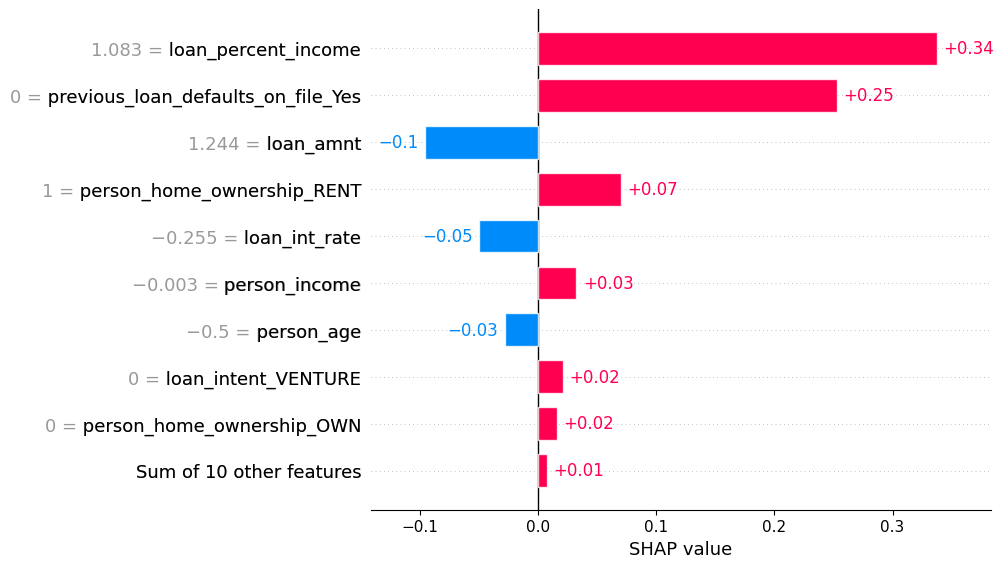

In [178]:
# bar plot
shap.plots.bar(row_shap_value)

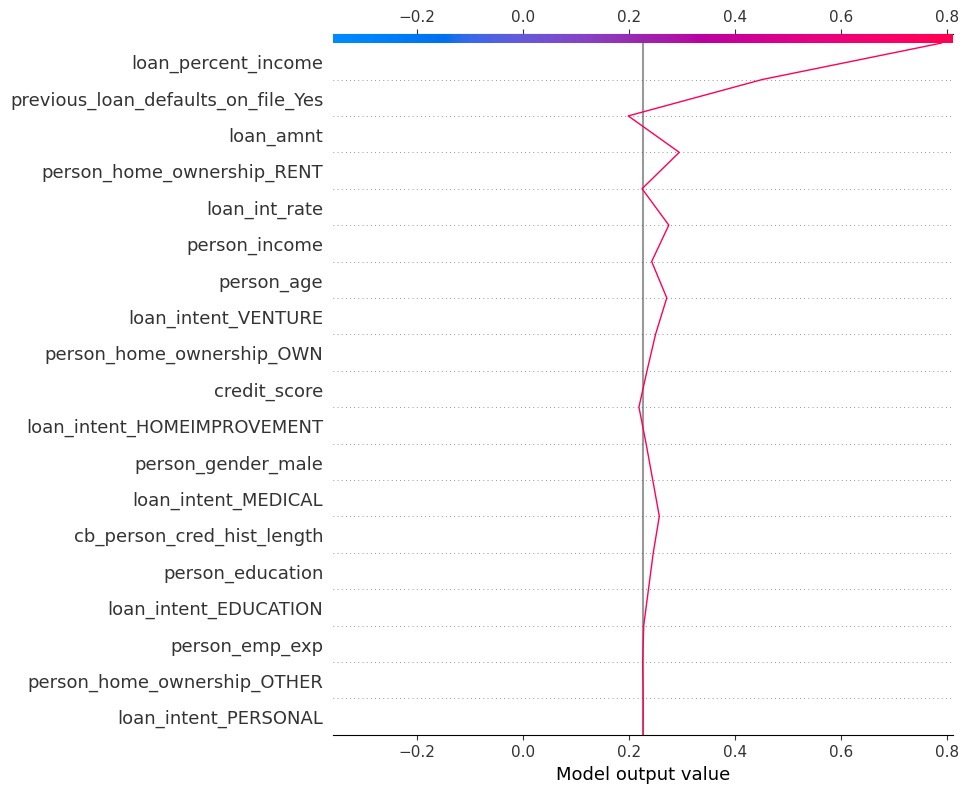

In [180]:
# decision plot

shap.plots.decision(shap_values=row_shap_value.values, base_value=base_value[0],
                    feature_names=feature_names)